In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/WB/MatstatHW/experiment_lesson_4.csv')
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [7]:
control = df[df['experiment_group'] == 'control']
test = df[df['experiment_group'] == 'test']

In [10]:
control

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
10087,2708,23.0,Central,control
10088,3918,45.0,Central,control
10089,9544,41.0,Suburb,control
10090,1101,38.0,Central,control


14


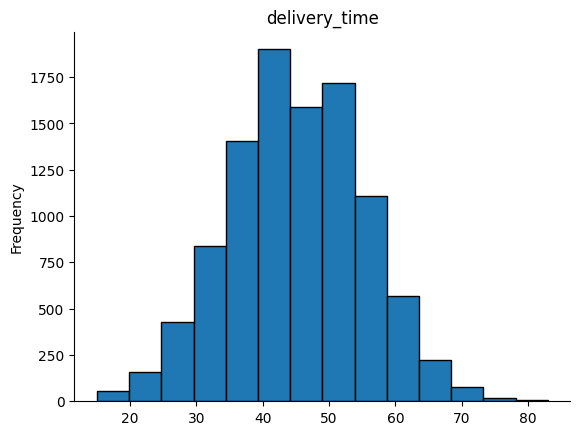

In [71]:
# @title Гистограмма delivery_time

import matplotlib.pyplot as plt
import numpy as np

n = len(control['delivery_time'])
k = int(round(1 + 3.3 * np.log10(n)))
print(k)
control['delivery_time'].plot(kind='hist', bins=k, title='delivery_time', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [73]:
import scipy.stats as stats

#!pip install pingouin
import pingouin as pg

control_norm_test = pg.normality(control['delivery_time'], method='normaltest', alpha = 0.05)
control_norm_test


,W,pval,normal
delivery_time,0.253498,0.880955,True


Время доставки в контрольной группе распределено нормально

In [61]:
print(f'Стандартное отклонение времени доставки в контрольной группе: {round(control["delivery_time"].std(), 2)}')

Стандартное отклонение времени доставки в контрольной группе: 9.99


In [70]:
test

,order_id,delivery_time,district,experiment_group
10092,12494,38.0,Purlieus,test
10093,12136,31.0,Purlieus,test
10094,11987,39.0,Purlieus,test
10095,12848,29.0,Central,test
10096,13166,31.0,Purlieus,test
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


14


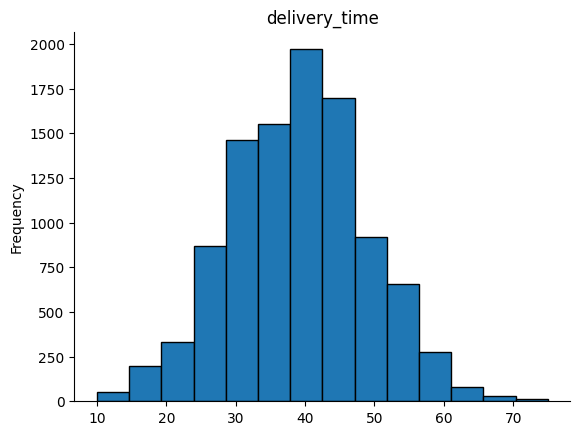

In [72]:
# @title Гистограмма delivery_time

from matplotlib import pyplot as plt
import numpy as np

n = len(test['delivery_time'])
k = int(round(1 + 3.3 * np.log10(n)))
print(k)
test['delivery_time'].plot(kind='hist', bins=k, title='delivery_time', edgecolor='black')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [52]:
import pingouin as pg

test_norm_test = pg.normality(test['delivery_time'], method='normaltest', alpha=0.05)
test_norm_test

,W,pval,normal
delivery_time,7.024157,0.029835,False


Время доставки в тестовой группе не распределено нормально

In [62]:
print(f'Стандартное отклонение времени доставки в тестовой группе: {round(test["delivery_time"].std(), 2)}')

Стандартное отклонение времени доставки в тестовой группе: 9.88


In [36]:
control_count = control['delivery_time'].count()
test_count = test['delivery_time'].count()

difference = abs(control_count - test_count)

print(f"Количество наблюдений в контрольной группе: {control_count}")
print(f"Количество наблюдений в тестовой группе: {test_count}")
print(f"Разница по модулю между количеством наблюдений в тесте и контроле: {difference}")

Количество наблюдений в контрольной группе: 10092
Количество наблюдений в тестовой группе: 10104
Разница по модулю между количеством наблюдений в тесте и контроле: 12


In [68]:
import scipy.stats as stats

# Вычислим t-статистику и p-значение с помощью ttest_ind
t_stat, p_value = stats.ttest_ind(control['delivery_time'], test['delivery_time'], equal_var=False)

alpha = 0.05

print("Значение статистики: ", t_stat)

if p_value < alpha:
    print("Присутствует статистически значимое различие во времени доставки между контрольной и экспериментальной группами.")
else:
    print("Нет доказательств статистически значимого различия во времени доставки между контрольной и экспериментальной группами.")


Значение статистики:  43.035552024241454
Обнаружено статистически значимое различие во времени доставки между контрольной и экспериментальной группами.


In [69]:
import numpy as np

control_mean = control['delivery_time'].mean()
test_mean = test['delivery_time'].mean()

percent_change = ((test_mean - control_mean) / control_mean) * 100

percent_change = np.round(percent_change, 2)
percent_change_str = f'{percent_change:.2f}%'

print("Среднее время доставки в контрольной группе: ", control_mean)
print("Среднее время доставки в тестовой группе: ", test_mean)

print(f'Среднее время доставки в тестовой группе изменилось на {percent_change_str} по сравнению с контрольной группой.')


Среднее время доставки в контрольной группе:  45.065101070154576
Среднее время доставки в тестовой группе:  39.04681314330958
Среднее время доставки в тестовой группе изменилось на -13.35% по сравнению с контрольной группой.


**Результаты АБ-теста**

Максимальное время доставки:

    - В контрольной группе максимум времени доставки лежит в диапазоне 40 - 50 минут.
    - В тестовой группе максимум времени доставки лежит в диапазоне 30 - 45 минут.

Тест нормальности:

    - Время доставки в контрольной группе распределено нормально.
    - Время доставки в тестовой группе не распределено нормально.

Сравнение выборок:

    - Количество наблюдений в контрольной группе: 10092.
    - Количество наблюдений в тестовой группе: 10104.
    - Разница по модулю между количеством наблюдений в тесте и контроле: 12
    - Значение t-статистики: 43,035552024241454.
    - Присутствует статистически значимое различие во времени доставки между контрольной и экспериментальной группами (p-значение < 0,05).

Среднее время доставки:

    - Среднее время доставки в контрольной группе: 45,065101070154576 минут.
    - Среднее время доставки в тестовой группе: 39,04681314330958 минут.

Процентное изменение:

    - Среднее время доставки в тестовой группе изменилось на -13,35% по сравнению с контрольной группой.

**Резултаты для человека, который не разбирается в статистике**



Новый алгоритм заключается в том, чтобы курьеры во время конца своей смены доставляли последний заказ по пути домой, что могло бы позволить сократить время ожидания клиентов во время пересмены.

Чаще всего время доставки без применения нового алгоритма занимает примерно 40 - 50 минут.

Курьеры, которые выполняют доставку по новому алгоритму чаще всего доставляют примерно за 30 - 45 минут.

В обеих группах было примерно одинаковое количество выполненных заказов (около 10000).

Среднее время доставки курьеров, которые работают по новому алгоритму значительно меньше, чем тех, кто работает по без его применения.

Среднее время доставки курьеров, которые доставляют последний заказ по пути домой составляет около 39 минут, что на 13,35% меньше, чем у тех, кто так не делает.